# Unit 5 - Financial Planning


In [172]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [173]:
# Load .env enviroment variables
load_dotenv() 

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [174]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [175]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [176]:
# Fetch current BTC price
btc_price_data = requests.get(btc_url + "?format=json")

# Fetch current ETH price
eth_price_data = requests.get(eth_url + "?format=json")

# Compute current value of my crpto
btc_data = btc_price_data.json()
eth_data = eth_price_data.json()

btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

print("The current value of one Bitcoin is:" + str(btc_price))
print("The current value of one Ether is:" + str(eth_price))
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of one Bitcoin is:32266.0
The current value of one Ether is:774.34
The current value of your 1.2 BTC is $38719.20
The current value of your 5.3 ETH is $4104.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [177]:
# Current amount of shares
num_spy = 50.00
num_agg = 200.00

In [178]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [179]:
# Format current date as ISO format
 # Format current date as ISO format
today = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
df_portfolio

AGG                                     SPY                   \
              open    high     low  close   volume    open    high      low   
2020-12-31  118.18  118.24  118.12  118.2  4325026  371.78  374.66  371.232   

                              
             close    volume  
2020-12-31  373.85  52720911

In [180]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.2
Current SPY closing price: $373.85


In [181]:
# Compute the current value of shares
my_spy_value = num_spy * agg_close_price
my_agg_value = num_agg * spy_close_price

# Print current value of share
print(f"The current value of your {num_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {num_agg} AGG shares is ${my_agg_value}")

The current value of your 50.0 SPY shares is $5910.0
The current value of your 200.0 AGG shares is $74770.0


### Savings Health Analysis

In [182]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto_savings = my_btc_value + my_eth_value
print(total_crypto_savings)

total_shares_savings = my_spy_value + my_agg_value
print(total_shares_savings)

df_savings = pd.DataFrame([total_crypto_savings, total_shares_savings], columns=['amount'])
df_savings[''] = ['crypto', 'shares']
df_savings.set_index('', inplace=True)
#df_savings.rename(index={'index':''}, inplace=True)

# Display savings DataFrame
display(df_savings)

42823.202
80680.0


amount
                 
crypto  42823.202
shares  80680.000

<AxesSubplot:ylabel='amount'>

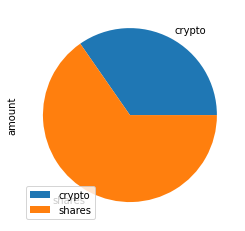

In [183]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='amount')

In [184]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_savings + total_shares_savings

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in your emergency fund ")
elif (total_savings == emergency_fund):
    printf("Congratulations! You have met your goals for emergency fund")
else :
    printf("You are short  by $" + str(emergency_fund - total_savings) + "to meet your emergency funds goal")

Congratulations! You have enough money in your emergency fund 


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [185]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [186]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [187]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [188]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [189]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2          3         4         5         6    \
0      1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   
1      0.986257  1.005592  0.999203   0.986953  1.011477  0.995199  1.017076   
2      0.990844  1.011010  0.993129   0.987991  1.008956  1.002153  1.026969   
3      1.005287  1.019027  0.991280   0.996444  1.004123  1.008096  1.040075   
4      1.006322  1.018811  0.983164   0.994694  1.016915  1.010761  1.034262   
...         ...       ...       ...        ...       ...       ...       ...   
7556  13.916456  3.187499  6.963341  25.098318  8.179016  4.165939  9.146337   
7557  14.022333  3.191397  6.997080  25.668312  8.171726  4.157275  9.136974   
7558  14.173402  3.112868  7.048482  25.523526  8.127950  4.149716  9.043415   
7559  14.280830  3.092972  6.997421  25.233298  8.104078  4.185844  9.064171   
7560  14.265855  3.077433  7.028009  25.468534  8.138698  4.164696  9.210838   

            7          8          9    ...        490        491       492  \
0      1.000000   1.000000   1.000000  ...   1.000000   1.000000  1.000000   
1      0.991284   1.012535   0.996379  ...   0.989688   1.005518  1.007999   
2      0.974915   1.009681   0.999263  ...   0.995617   1.027091  1.012268   
3      0.973653   1.015559   0.995286  ...   0.996535   1.021449  1.008634   
4      0.971915   1.013533   0.986068  ...   1.003108   1.020263  1.013689   
...         ...        ...        ...  ...        ...        ...       ...   
7556  42.377802  12.433298   9.779545  ...  11.466126  11.120170  4.590884   
7557  42.449926  12.365979   9.867052  ...  11.641832  11.154347  4.604190   
7558  42.602127  12.307573  10.025083  ...  11.502020  11.137746  4.571907   
7559  42.543380  12.261141   9.941600  ...  11.503431  11.035967  4.527195   
7560  42.580498  12.358035  10.045064  ...  11.578690  10.929772  4.558134   

           493        494       495        496       497        498        499  
0     1.000000   1.000000  1.000000   1.000000  1.000000   1.000000   1.000000  
1     0.999731   1.013458  1.007839   1.004089  1.002074   1.004648   0.989214  
2     1.005411   1.014205  0.996931   0.999888  1.000073   1.008731   0.972592  
3     1.016287   1.012895  1.000203   1.005087  0.995904   1.012953   0.978152  
4     1.004162   0.997936  0.989385   1.000635  0.997229   1.027547   0.981638  
...        ...        ...       ...        ...       ...        ...        ...  
7556  2.952627  19.374919  8.892550  22.590005  3.700339  10.095721  28.461715  
7557  2.947589  19.319100  8.954202  22.371104  3.703075  10.201615  28.521769  
7558  2.932740  19.606293  8.986275  22.297394  3.701548  10.258279  28.547376  
7559  2.920386  19.878766  9.072624  22.343851  3.692154  10.367622  28.525015  
7560  2.927199  19.968341  9.091747  22.226109  3.691309  10.472215  28.188244  

[7561 rows x 500 columns]

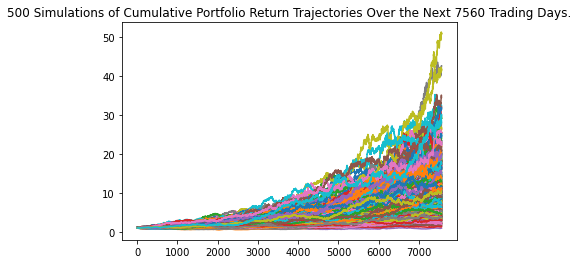

In [190]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

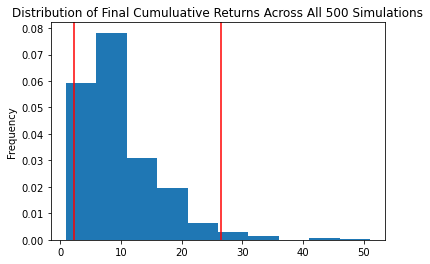

In [191]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [192]:
# Fetch summary statistics from the Monte Carlo simulation 
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.844598
std               6.584405
min               0.930548
25%               5.128803
50%               8.271285
75%              12.195628
max              51.020163
95% CI Lower      2.281732
95% CI Upper     26.459899
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [193]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45634.63 and $529197.98


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [194]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68451.95 and $793796.97


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [195]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [196]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.002974  1.013144  1.008030  1.003826  0.995982  1.007055  1.016910   
2     1.004191  1.021260  1.002787  1.002255  0.997663  0.990032  1.017237   
3     1.007252  1.017376  1.006301  1.014328  0.985453  0.992595  1.015930   
4     0.996065  1.018282  0.996869  1.012992  0.990223  0.985375  1.009959   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.014340  1.230384  0.975559  1.526971  0.841667  1.243592  2.065501   
1257  1.026165  1.238299  0.969512  1.513487  0.841293  1.229797  2.059253   
1258  1.017669  1.243160  0.971475  1.510272  0.847635  1.220972  2.058558   
1259  1.016375  1.244602  0.964685  1.502528  0.843072  1.228007  2.072581   
1260  1.014286  1.251092  0.956943  1.504559  0.832617  1.223843  2.072720   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997314  1.008784  1.008613  ...  1.007392  0.982108  0.996650   
2     1.004734  1.023884  0.998568  ...  1.018634  0.988837  1.001489   
3     1.008957  1.020864  0.991116  ...  1.030490  0.990858  0.993754   
4     1.005455  1.020015  0.980679  ...  1.031644  0.973796  0.994692   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.175591  1.415386  1.801874  ...  1.793639  1.059529  1.491541   
1257  1.185956  1.401297  1.820284  ...  1.791044  1.052594  1.485755   
1258  1.174749  1.392678  1.826245  ...  1.790025  1.055829  1.488684   
1259  1.174921  1.387146  1.812525  ...  1.796698  1.051368  1.490330   
1260  1.175254  1.399195  1.824997  ...  1.789245  1.061599  1.483581   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.000370  0.991916  0.997637  0.991384  1.002853  0.993697  1.002019  
2     1.012027  0.979768  0.995984  0.999832  1.017594  0.996312  1.015250  
3     1.014188  0.978858  0.993505  0.988571  1.015375  0.993747  1.020081  
4     1.016581  0.981918  0.985386  0.992554  1.014943  1.002905  1.024137  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.432849  1.203365  1.463944  2.621390  2.221668  1.013552  1.597510  
1257  1.437293  1.213869  1.466817  2.639861  2.208628  1.005678  1.590795  
1258  1.431830  1.209342  1.460940  2.634195  2.214021  1.018859  1.583435  
1259  1.446498  1.211468  1.473055  2.675068  2.216682  1.001467  1.577319  
1260  1.458383  1.190345  1.476381  2.639413  2.222126  1.000298  1.588949  

[1261 rows x 500 columns]

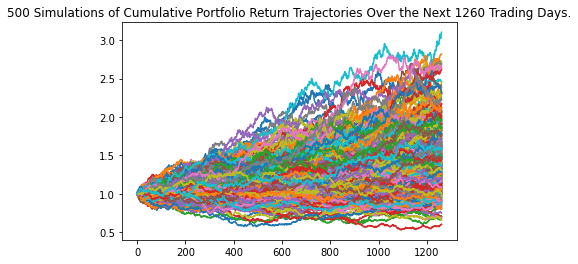

In [197]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

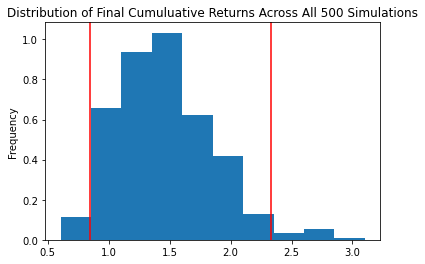

In [198]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [199]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.457141
std               0.392207
min               0.605133
25%               1.163461
50%               1.402773
75%               1.672303
max               3.101786
95% CI Lower      0.847122
95% CI Upper      2.335271
Name: 1260, dtype: float64


In [200]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $50827.34 and $140116.24


### Ten Years Retirement Option

In [201]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [202]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004529  0.995668  1.001700  0.985941  0.994477  0.995213  1.001339   
2     0.996862  0.990500  0.996116  0.986394  0.998520  0.997727  0.989923   
3     0.995870  0.995968  1.004320  0.994666  0.995670  0.995055  0.990188   
4     1.002201  1.002796  1.006487  0.998563  1.004411  0.999602  0.975282   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.805476  2.972179  3.741896  2.291157  2.062439  2.192883  2.472690   
2517  2.797813  2.955447  3.741905  2.317169  2.060719  2.190388  2.494439   
2518  2.825250  2.923498  3.789142  2.309510  2.057985  2.182256  2.493516   
2519  2.779730  2.906518  3.788517  2.336701  2.081580  2.177449  2.502912   
2520  2.780104  2.883492  3.758720  2.333415  2.066915  2.154853  2.546388   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002457  1.000190  0.991694  ...  1.007366  1.000434  1.006334   
2     1.002355  1.015113  1.008072  ...  1.009001  1.003430  1.006316   
3     0.993373  1.018000  1.010521  ...  1.013696  1.002235  1.007143   
4     0.986740  1.010024  1.022606  ...  1.010907  1.002838  0.995586   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.470512  2.270547  2.160421  ...  3.754317  2.110077  2.280145   
2517  2.471119  2.300244  2.163787  ...  3.741785  2.100191  2.263821   
2518  2.498331  2.276568  2.155512  ...  3.742614  2.079581  2.288729   
2519  2.515375  2.303631  2.157484  ...  3.742229  2.073840  2.304620   
2520  2.533202  2.298657  2.188117  ...  3.697833  2.068838  2.298847   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.993198  1.013060  0.997669  1.018267  1.001254  1.006915  1.010474  
2     1.002580  1.018495  0.996287  1.016440  1.006157  1.010614  1.003051  
3     0.999039  1.022099  0.995162  1.022179  1.009374  1.008610  1.006534  
4     0.987437  1.036100  0.994901  1.031457  1.001945  1.014395  0.992262  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.667202  2.508747  2.348283  3.570780  1.363169  1.392287  2.071928  
2517  1.640990  2.537440  2.333474  3.568894  1.384478  1.379400  2.069129  
2518  1.647471  2.566994  2.320916  3.517806  1.389312  1.374387  2.043417  
2519  1.663600  2.570181  2.306395  3.517745  1.392104  1.367431  2.058350  
2520  1.663074  2.545335  2.311697  3.520002  1.395863  1.360235  2.071101  

[2521 rows x 500 columns]

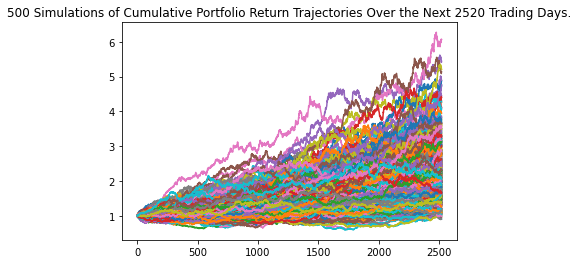

In [203]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

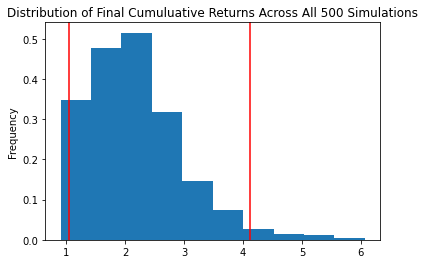

In [204]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [205]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.170276
std               0.812682
min               0.901043
25%               1.554682
50%               2.071194
75%               2.593447
max               6.068130
95% CI Lower      1.050300
95% CI Upper      4.112664
Name: 2520, dtype: float64


In [206]:
# Set initial investment
initial_investment = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63017.97 and $246759.84
